# Exploratory Data Analysis
### Download the dataset: [mempool sample data](https://drive.google.com/drive/folders/1GZ-1Lffva-z-jjvk4D80DJI1Oj_46hRS?usp=sharing)


WIP 

1. Select a random sample from the data of 1000 (consider data where status is not nan) . 
2. Do Data explorations: histograms of countinous columns, bar plot of discrete, pairplot of continuous colored by status, by region,.... Note what find interresting, wierd, etc. 
3. same exploration for  just a select a random sample from the data of size 1000

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read in sample.csv into a dataframe with \t delimiter
df = pd.read_csv('sample.csv', sep='\t')
print("Dataset shape: ", df.shape)
df.head()

Dataset shape:  (403212, 27)


,detecttime,hash,status,region,reorg,replace,curblocknumber,failurereason,blockspending,timepending,...,network,type,maxpriorityfeepergas,maxfeepergas,basefeepergas,dropreason,rejectionreason,stuck,gasused,detect_date
0,2023-02-24T00:00:00.167Z,0x2b7cd2e8fd547f4ef784e6713a8c06926a0ff1ced45b...,pending,us-east-1,NaN,NaN,16694512,none,NaN,NaN,...,main,2,3.000000e+09,4.702304e+10,28122281784,NaN,NaN,False,-1.0,2023-02-24
1,2023-02-24T00:00:00.253Z,0x2b7cd2e8fd547f4ef784e6713a8c06926a0ff1ced45b...,pending,eu-central-1,NaN,NaN,16694512,none,NaN,NaN,...,main,2,3.000000e+09,4.702304e+10,28122281784,NaN,NaN,False,-1.0,2023-02-24
2,2023-02-24T00:00:00.280Z,0x2b7cd2e8fd547f4ef784e6713a8c06926a0ff1ced45b...,pending,ap-southeast-1,NaN,NaN,16694512,none,NaN,NaN,...,main,2,3.000000e+09,4.702304e+10,28122281784,NaN,NaN,False,-1.0,2023-02-24
3,2023-02-24T00:00:00.374Z,0x44bfc98df9a35e3cd4f144bba9e89afdb12122747dda...,pending,eu-central-1,NaN,NaN,16694512,none,NaN,NaN,...,main,2,1.000000e+09,4.604646e+10,28122281784,NaN,NaN,False,-1.0,2023-02-24
4,2023-02-24T00:00:00.383Z,0x44bfc98df9a35e3cd4f144bba9e89afdb12122747dda...,pending,us-east-1,NaN,NaN,16694512,none,NaN,NaN,...,main,2,1.000000e+09,4.604646e+10,28122281784,NaN,NaN,False,-1.0,2023-02-24


# Explore a random sample data, n=1000

In [5]:
# Select a random sample from the data of 1000 rows
df = df.sample(n=1000, random_state=1)

In [6]:
# Get list of all columns
print(df.columns)

Index(['detecttime', 'hash', 'status', 'region', 'reorg', 'replace',
       'curblocknumber', 'failurereason', 'blockspending', 'timepending',
       'nonce', 'gas', 'gasprice', 'value', 'toaddress', 'fromaddress',
       'input', 'network', 'type', 'maxpriorityfeepergas', 'maxfeepergas',
       'basefeepergas', 'dropreason', 'rejectionreason', 'stuck', 'gasused',
       'detect_date'],
      dtype='object')


## Create bar charts for discrete variables and histograms for continuous variables

### status - status of the transaction

<Axes: xlabel='status'>

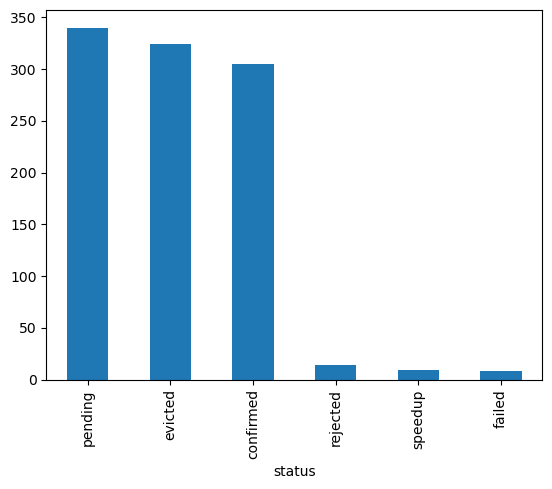

In [7]:
# bar plot of 'status'
df['status'].value_counts().plot(kind='bar')

### region - the geographic region for the node that detected the transaction

<Axes: xlabel='region'>

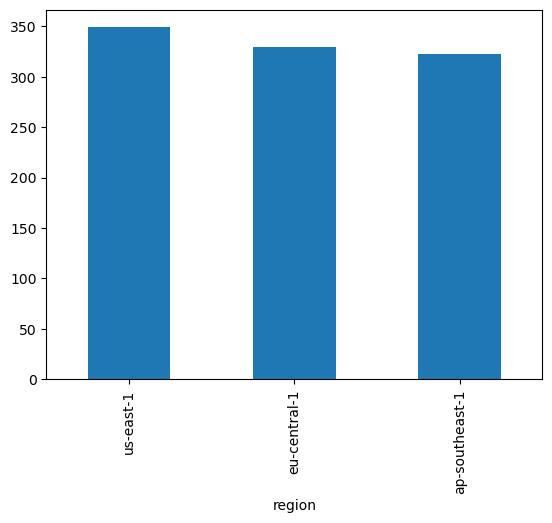

In [8]:
# bar plot of region
df['region'].value_counts().plot(kind='bar')

### failurereason - if a transaction failed, this field provide contextual information

Count of unique failure reasons:  8 

Value counts for failure reason:  failurereason
Reverted: \TRANSFER_FROM_FAILED\""                                 2
Reverted: \Reason not specified\""                                 2
Reverted: \TransferHelper::transferFrom: transferFrom failed\""    1
Reverted: \Signed block number out of range\""                     1
Reverted: \Max supply exceeded!\""                                 1
Reverted: \This is already taken\""                                1
Name: count, dtype: int64


Text(0.5, 1.0, 'failurereason')

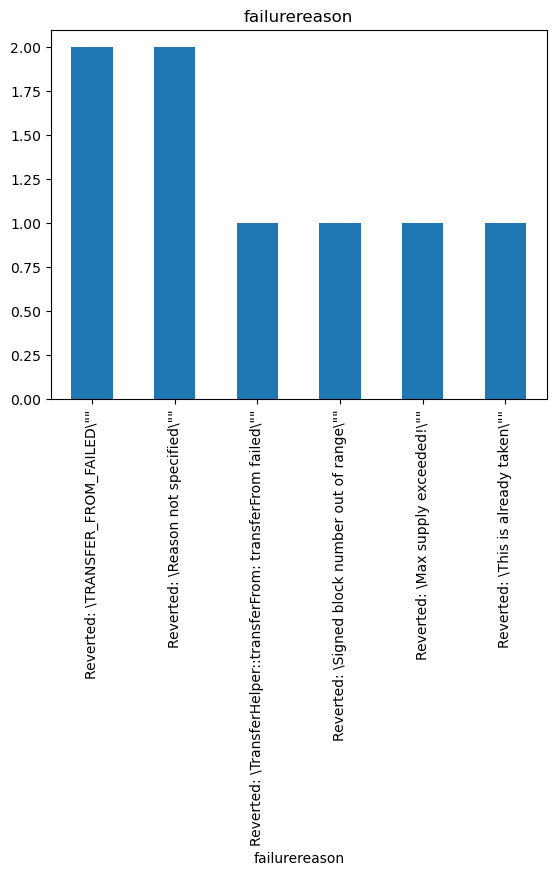

In [12]:
# print unique values of 'failurereason'
print("Count of unique failure reasons: ", len(df['failurereason'].unique()), "\n")

temp = df[df['failurereason'] != 'none']

# create bar plot of 'failurereason'
print("Value counts for failure reason: ",temp['failurereason'].value_counts())

# create bar plot of 'failurereason'
temp['failurereason'].value_counts().plot(kind='bar')
plt.title('failurereason')

### blockspending - if a transaction was finalized (confirmed, failed), this refers to the number of blocks that the transaction was waiting to get on chain


Count of unique blockspending:  14 



<Axes: xlabel='blockspending'>

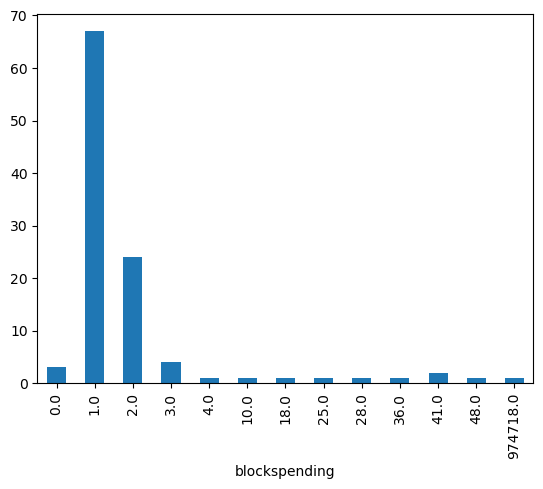

In [56]:
# print unique count of 'blockspending'
print("\nCount of unique blockspending: ", len(df['blockspending'].unique()), "\n")

# plot bar chart of 'blockspending'
df['blockspending'].value_counts().sort_index().plot(kind='bar')

### timepending - if a transaction was finalized (confirmed, failed), this refers to the time in milliseconds that the transaction was waiting to get on chain


Count of unique timepending:  106 



Text(0.5, 1.0, 'timepending (milliseconds) with outliers')

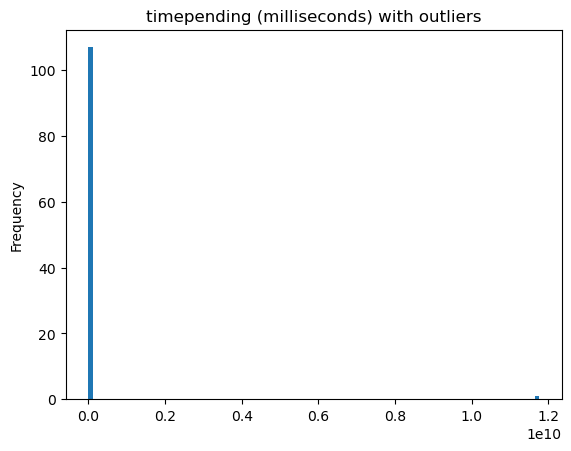

In [13]:
# count the unique values in timepending
print("\nCount of unique timepending: ", len(df['timepending'].unique()), "\n")

# plot hist of 'timepending' (with nan and outlier(s))
df['timepending'].plot(kind='hist', bins=100)
plt.title("timepending (milliseconds) with outliers")

Time pending <= 6000000000:
timepending
(-602.18, 30108.95]      98
(30108.95, 60217.9]       1
(60217.9, 90326.85]       0
(90326.85, 120435.8]      1
(120435.8, 150544.75]     0
(150544.75, 180653.7]     0
(180653.7, 210762.65]     0
(210762.65, 240871.6]     1
(240871.6, 270980.55]     0
(270980.55, 301089.5]     1
(301089.5, 331198.45]     1
(331198.45, 361307.4]     0
(361307.4, 391416.35]     0
(391416.35, 421525.3]     0
(421525.3, 451634.25]     0
(451634.25, 481743.2]     1
(481743.2, 511852.15]     1
(511852.15, 541961.1]     1
(541961.1, 572070.05]     0
(572070.05, 602179.0]     1
Name: count, dtype: int64


Time pending > 6000000000:
timepending
1.176663e+10    1
Name: count, dtype: int64


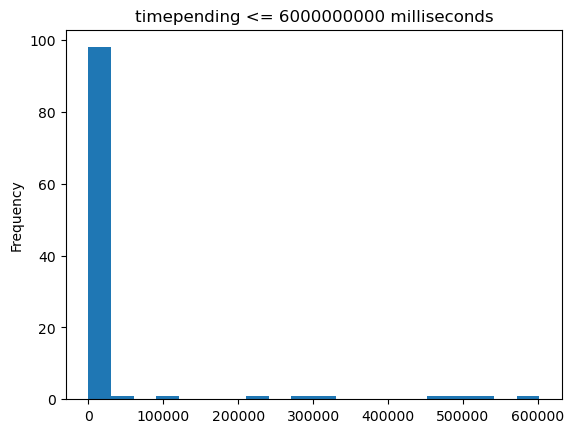

In [14]:
# remove nan and outlier(s)
temp = df[df['timepending'].notnull()]  # remove nan
temp2 = temp[temp['timepending'] <= 6000000000]

# plot hist of 'timepending' (without nan and outlier(s))
temp2['timepending'].plot(kind='hist', bins=20)
plt.title("timepending <= 6000000000 milliseconds")


# print some value counts
print("Time pending <= 6000000000:")
print(temp2['timepending'].value_counts(bins=20).sort_index())

print("\n\nTime pending > 6000000000:")
print(temp[temp['timepending'] > 6000000000]['timepending'].value_counts().sort_index())


Text(0.5, 1.0, 'timepending < 30000 milliseconds')

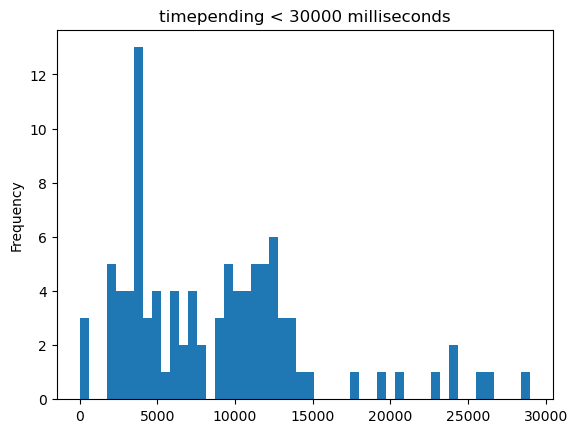

In [303]:
# ZOOM plot hist of 'timepending'
temp = df[df['timepending'] < 30000]
temp['timepending'].plot(kind='hist', bins=50)
plt.title("timepending < 30000 milliseconds")

### gas - every ETH tx has a fee to incentivize miners to conduct a on the blockchain. this is referred to as "gas" in the ETH network. Gas is denominated in gwei (or 0.000000001 ETH). txs with more gas are executed more quickly

<Axes: ylabel='Frequency'>

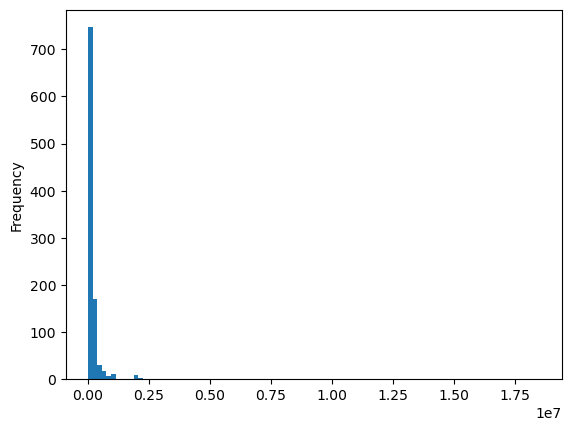

In [15]:
# histogram of gas
df['gas'].plot(kind='hist', bins=100)

Text(0.5, 1.0, 'gas - zoom')

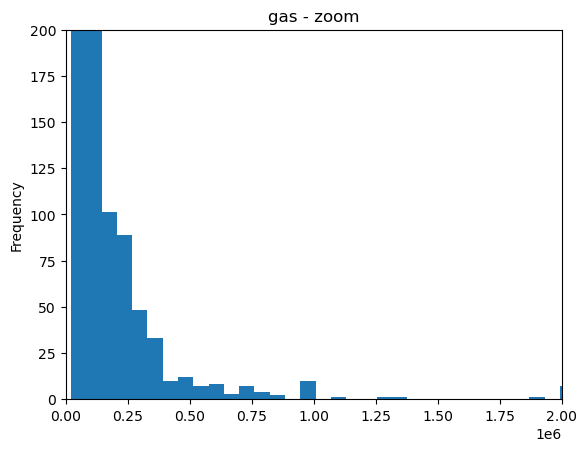

In [16]:
# zoom in on histogram of gas where x <= 5e7 and y <= 200
df['gas'].plot(kind='hist', bins=300, xlim=(0,.2e7), ylim=(0,200))
plt.title("gas - zoom")

### gasprice - The price offered to the miner to purchase gas (denominated in gwei)

Text(0.5, 1.0, 'gasprice')

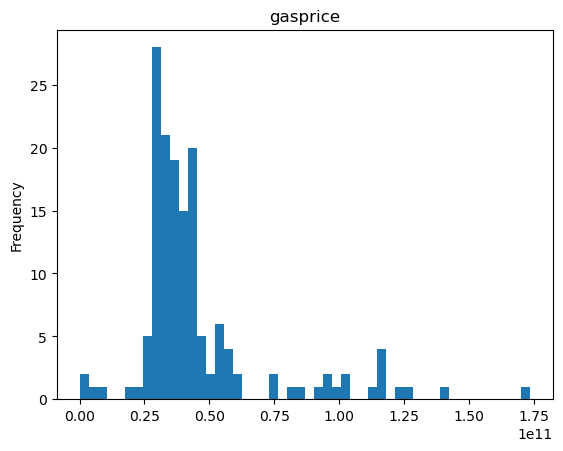

In [307]:
df['gasprice'].plot(kind='hist', bins=50)
plt.title("gasprice")

### value - the amount of ETH (denominated in gwei) transferred


Count of unique value:  296 



Text(0.5, 1.0, 'value')

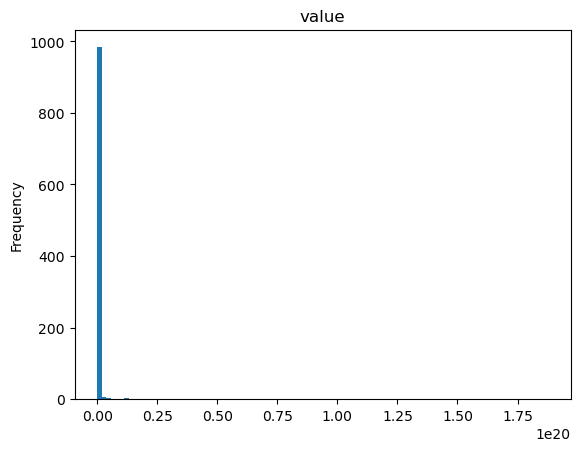

In [27]:
# get unique values of 'value'
print("\nCount of unique value: ", len(df['value'].unique()), "\n")

value = df[df['value'].notnull()]
value['value'] = value['value'].astype(float)

# histogram of 'value'
value['value'].plot(kind='hist', bins=100)
plt.title("value")

In [29]:
print(value['value'].value_counts(bins = 50).sort_index(), "\n\n")

# print count of value == 0
print("\nCount of value == 0: ", len(value[value['value'] == 0]), "\n")

value
(-973900000000000.0, 1.9478e+16]        733
(1.9478e+16, 3.8956e+16]                 36
(3.8956e+16, 5.8434e+16]                 41
(5.8434e+16, 7.7912e+16]                 22
(7.7912e+16, 9.739e+16]                  19
(9.739e+16, 1.16868e+17]                 22
(1.16868e+17, 1.36346e+17]               13
(1.36346e+17, 1.55824e+17]                7
(1.55824e+17, 1.75302e+17]                7
(1.75302e+17, 1.9478e+17]                 5
(1.9478e+17, 2.14258e+17]                 2
(2.14258e+17, 2.33736e+17]                2
(2.33736e+17, 2.53214e+17]                9
(2.53214e+17, 2.72692e+17]                3
(2.72692e+17, 2.9217e+17]                 3
(2.9217e+17, 3.11648e+17]                10
(3.11648e+17, 3.31126e+17]                4
(3.31126e+17, 3.50604e+17]                1
(3.50604e+17, 3.70082e+17]                2
(3.70082e+17, 3.8956e+17]                 1
(3.8956e+17, 4.09038e+17]                 2
(4.09038e+17, 4.28516e+17]                1
(4.28516e+17, 4.47994e+17]

Note that ~ half of values are 0... let's look at non-zero values...

value
(-973899999983082.1, 1.9478000000016564e+16]        183
(1.9478000000016564e+16, 3.895600000001623e+16]      36
(3.895600000001623e+16, 5.8434000000015896e+16]      41
(5.8434000000015896e+16, 7.791200000001555e+16]      22
(7.791200000001555e+16, 9.739000000001522e+16]       19
(9.739000000001522e+16, 1.1686800000001488e+17]      22
(1.1686800000001488e+17, 1.3634600000001454e+17]     13
(1.3634600000001454e+17, 1.558240000000142e+17]       7
(1.558240000000142e+17, 1.753020000000139e+17]        7
(1.753020000000139e+17, 1.9478000000001354e+17]       5
(1.9478000000001354e+17, 2.142580000000132e+17]       2
(2.142580000000132e+17, 2.3373600000001286e+17]       2
(2.3373600000001286e+17, 2.5321400000001254e+17]      9
(2.5321400000001254e+17, 2.726920000000122e+17]       3
(2.726920000000122e+17, 2.9217000000001184e+17]       3
(2.9217000000001184e+17, 3.116480000000115e+17]      10
(3.116480000000115e+17, 3.311260000000112e+17]        4
(3.311260000000112e+17, 3.506040000000109e

Text(0.5, 1.0, 'value (in wei) - zoom. 0 < value < 1e18')

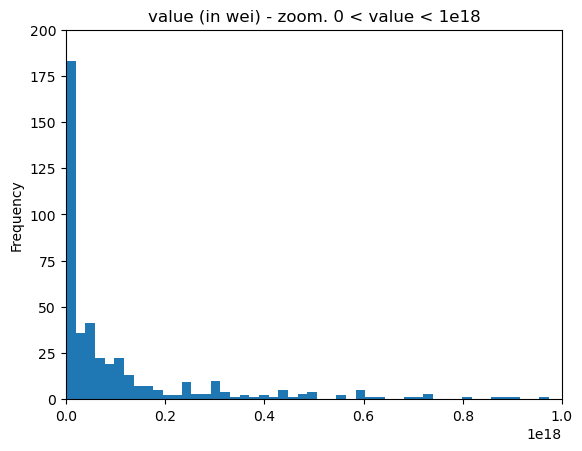

In [30]:
# print value counts of 'value' grouped into 500 bins
temp = value[value['value'] > 0]
temp = temp[temp['value'] < 1e18]
print(temp['value'].value_counts(bins = 50).sort_index())

# plot 
temp['value'].plot(kind='hist', bins=50, xlim=(0,1e18), ylim=(0,200))
plt.title("value (in wei) - zoom. 0 < value < 1e18")


value
(-99050433427011.1, 1981008668895143.0]             89
(1981008668895143.0, 3962017337773385.0]            11
(3962017337773385.0, 5943026006651626.0]             6
(5943026006651626.0, 7924034675529869.0]            18
(7924034675529869.0, 9905043344408112.0]            10
(9905043344408112.0, 1.1886052013286352e+16]        17
(1.1886052013286352e+16, 1.3867060682164596e+16]    11
(1.3867060682164596e+16, 1.5848069351042836e+16]     9
(1.5848069351042836e+16, 1.782907801992108e+16]      3
(1.782907801992108e+16, 1.981008668879932e+16]       9
(1.981008668879932e+16, 2.1791095357677564e+16]      0
(2.1791095357677564e+16, 2.3772104026555804e+16]     2
(2.3772104026555804e+16, 2.5753112695434044e+16]    11
(2.5753112695434044e+16, 2.773412136431229e+16]      5
(2.773412136431229e+16, 2.9715130033190532e+16]      1
(2.9715130033190532e+16, 3.1696138702068772e+16]    10
(3.1696138702068772e+16, 3.3677147370947012e+16]     1
(3.3677147370947012e+16, 3.5658156039825256e+16]     6
(3.5

Text(0.5, 1.0, 'value (in wei) - zoom. 0 < value < 1e17')

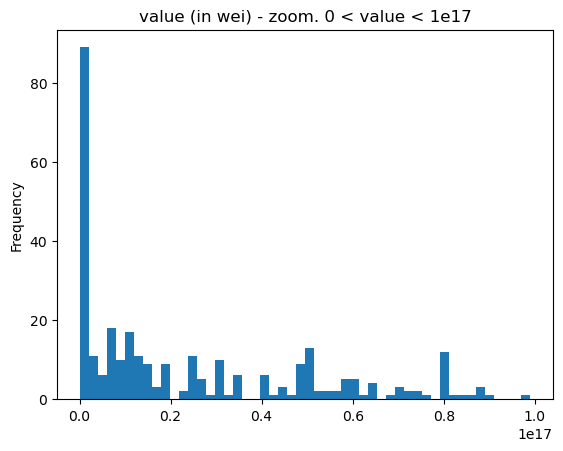

In [34]:
# print value counts of 'value' grouped into 500 bins
temp = temp[temp['value'] < .1e18]
print(temp['value'].value_counts(bins = 50).sort_index())

# plot 
temp['value'].plot(kind='hist', bins=50) #, xlim=(0,1e18), ylim=(0,200))
plt.title("value (in wei) - zoom. 0 < value < 1e17")


### toaddress - destination of a given tx
### fromaddress - source/initiator of a given tx

In [182]:
# print count of unique 'toaddress'
print("\nCount of unique toaddress: ", len(df['toaddress'].unique()))

# print count of unique 'fromaddress'
print("\nCount of unique fromaddress: ", len(df['fromaddress'].unique()))


Count of unique toaddress:  479

Count of unique fromaddress:  874


### network - the specific ETH network used

In [185]:
# print count of unique values in 'network'
print("\nCount of unique network: ", len(df['network'].unique()))
print(df['network'].value_counts())



Count of unique network:  1
network
main    1000
Name: count, dtype: int64


### type - Post EIP-1559, this indicates how the gas parameters are submitted to the network: type 0 - legacy type 2 - using maxpriorityfeepergas and maxfeepergas

type
2    848
0    150
1      2
Name: count, dtype: int64


Text(0.5, 1.0, 'type\n\ntype 0: legacy\ntype 2: using maxpriorityfeepergas and maxfeepergas')

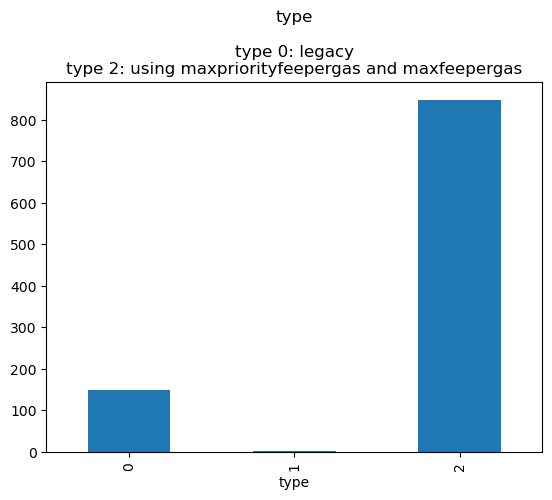

In [194]:
print(df['type'].value_counts())

# bar chart of type
df['type'].value_counts().sort_index().plot(kind='bar')
plt.title("type\n\ntype 0: legacy\ntype 2: using maxpriorityfeepergas and maxfeepergas")

### maxpriorityfeepergas - the ceiling value for a possible tip to the miner. the actual tip paid can be lower if (maxfee - basefee) < maxpriorityfee. denominated in gwei

<Axes: ylabel='Frequency'>

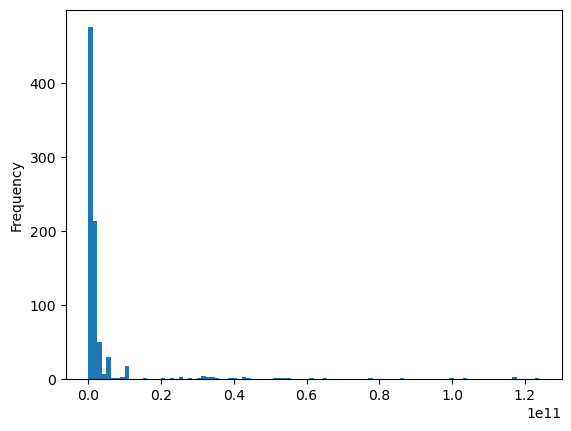

In [209]:
# histogram of 'maxpriorityfeepergas'
df['maxpriorityfeepergas'].plot(kind='hist', bins=100)


Count of values in maxpriorityfeepergas <= 0:  1 

maxpriorityfeepergas
(-124000000.001, 620000000.0]       331
(620000000.0, 1240000000.0]         145
(1240000000.0, 1860000000.0]         51
(1860000000.0, 2480000000.0]        163
(2480000000.0, 3100000000.0]         46
                                   ... 
(120900000000.0, 121520000000.0]      0
(121520000000.0, 122140000000.0]      0
(122140000000.0, 122760000000.0]      0
(122760000000.0, 123380000000.0]      0
(123380000000.0, 124000000000.0]      1
Name: count, Length: 200, dtype: int64


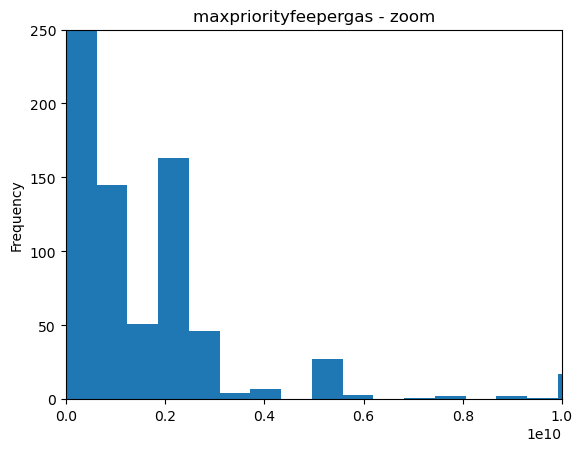

In [311]:
# count zero values in 'maxpriorityfeepergas'
print("\nCount of values in maxpriorityfeepergas <= 0: ", len(df[df['maxpriorityfeepergas'] <= 0]), "\n")

# Zoom in on 'maxpriorityfeepergas' where x <= 1e10 and y <= 250
df['maxpriorityfeepergas'].plot(kind='hist', bins=200, xlim=(0,1e10), ylim=(0,250))
plt.title("maxpriorityfeepergas - zoom")

print(df['maxpriorityfeepergas'].value_counts(bins = 200).sort_index())

### maxfeepergas - the maximum possible gas that a sender is willing to pay including basefee and tip. must be lower than the maxpriorityfeepergas. denominated in gwei

Text(0.5, 1.0, 'maxfeepergas (gwei)')

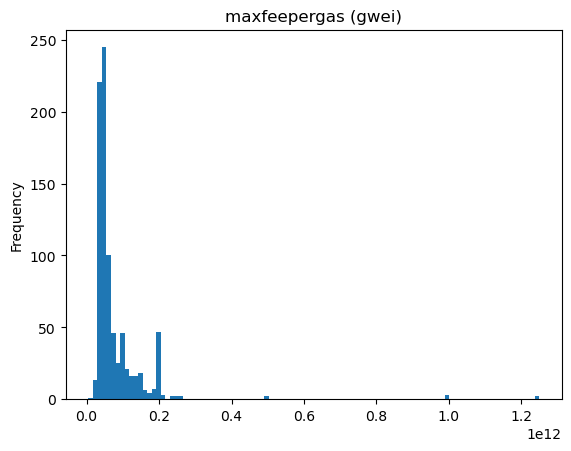

In [315]:
# histogram of 'maxfeepergas'
df['maxfeepergas'].plot(kind='hist', bins=100)
plt.title("maxfeepergas (gwei)")

Text(0.5, 1.0, 'maxfeepergas (gwei) - zoom')

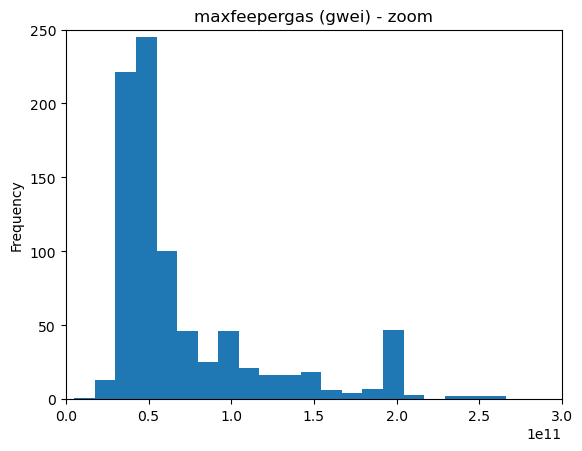

In [316]:
# zoom
df['maxfeepergas'].plot(kind='hist', bins=100, xlim=(0,.3e12), ylim=(0,250))
plt.title("maxfeepergas (gwei) - zoom")

### basefeepergas - this is the gas price that is paid and burned in order to be set. the basefee is algorithmically determined. denominated in gwei

basefeepergas
(24184809460.82, 25182139939.79]      12
(25182139939.79, 26088804011.58]      11
(26088804011.58, 26995468083.37]      17
(26995468083.37, 27902132155.16]      68
(27902132155.16, 28808796226.95]      57
                                      ..
(110408562688.05, 111315226759.84]     2
(111315226759.84, 112221890831.63]     5
(112221890831.63, 113128554903.42]     0
(113128554903.42, 114035218975.21]     3
(114035218975.21, 114941883047.0]      4
Name: count, Length: 100, dtype: int64


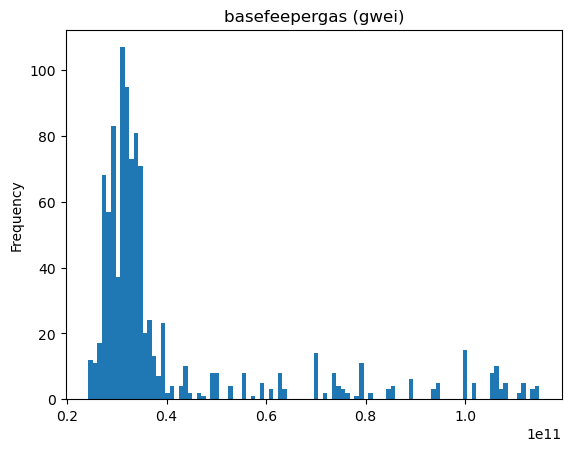

In [317]:
# hist
df['basefeepergas'].plot(kind='hist', bins=100)
plt.title("basefeepergas (gwei)")

print(df['basefeepergas'].value_counts(bins = 100).sort_index())

### dropreason - if the transaction was dropped from the mempool, this describes the contextual reason for the drop


Count of unique dropreason:  7 

dropreason
low-nonce-txs       306
replaced-txs          9
truncating-txs        5
account-cap-txs       2
unexecutable-txs      1
underpriced-txs       1
Name: count, dtype: int64


Text(0.5, 1.0, 'dropreason')

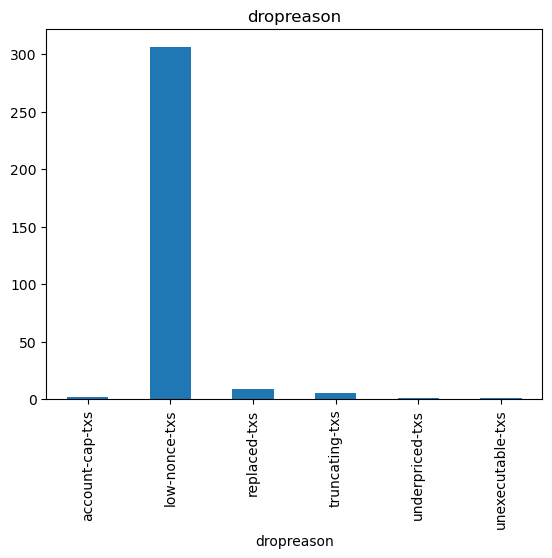

In [318]:
# print count of unique values for dropreason
print("\nCount of unique dropreason: ", len(df['dropreason'].unique()), "\n")
print(df['dropreason'].value_counts())

# bar chart of 'dropreason'
df['dropreason'].value_counts().sort_index().plot(kind='bar')
plt.title("dropreason")

### rejectionreason - if the tansaction was rejected from the mempool, this describes the contextual reason for the rejection

In [319]:
# print count of unique values for 'rejectreason'
print("\nCount of unique rejectionreason: ", len(df['rejectionreason'].unique()), "\n")
print(df['rejectionreason'].value_counts())



Count of unique rejectionreason:  2 

rejectionreason
nonce too low    14
Name: count, dtype: int64


In [269]:
# What does "nonce too low" rejectionreason look like?
# TODO Confirm if this is the correct logic.. 
for i, row in enumerate(df['rejectionreason']):
    if row == "nonce too low":
        print("nonce: ", df['nonce'].iloc[i])

nonce:  21
nonce:  2942
nonce:  329
nonce:  663
nonce:  32
nonce:  313
nonce:  15
nonce:  72
nonce:  64
nonce:  5445758
nonce:  183
nonce:  4
nonce:  47
nonce:  70425


### gasused - if transaction was published on-chain, this value indicates the amount of gas that was actually consumed. Denominated in gwei (or 0.000000001 ETH)

Text(0.5, 1.0, 'gasused')

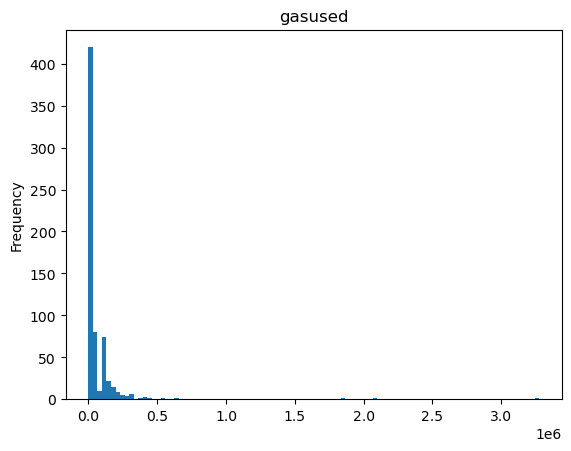

In [323]:
# hist of 'gasused'
df['gasused'].plot(kind='hist', bins=100)
plt.title("gasused")

In [276]:
# count null values of gasused
print("\nCount of null values in gasused: ", len(df[df['gasused'].isnull()]), "\n")

# count < 0 values of gasused
print("\nCount of values in gasused <= 0: ", len(df[df['gasused'] < 0]), "\n")


Count of null values in gasused:  347 


Count of values in gasused <= 0:  340 



Count of gasused > 0 313


gasused
(17743.142, 86137.14]       168
(86137.14, 151274.28]        91
(151274.28, 216411.42]       27
(216411.42, 281548.56]       11
(281548.56, 346685.7]         7
(346685.7, 411822.84]         2
(411822.84, 476959.98]        2
(476959.98, 542097.12]        0
(542097.12, 607234.26]        1
(607234.26, 672371.4]         1
(672371.4, 737508.54]         0
(737508.54, 802645.68]        0
(802645.68, 867782.82]        0
(867782.82, 932919.96]        0
(932919.96, 998057.1]         0
(998057.1, 1063194.24]        0
(1063194.24, 1128331.38]      0
(1128331.38, 1193468.52]      0
(1193468.52, 1258605.66]      0
(1258605.66, 1323742.8]       0
(1323742.8, 1388879.94]       0
(1388879.94, 1454017.08]      0
(1454017.08, 1519154.22]      0
(1519154.22, 1584291.36]      0
(1584291.36, 1649428.5]       0
(1649428.5, 1714565.64]       0
(1714565.64, 1779702.78]      0
(1779702.78, 1844839.92]      0
(1844839.92, 1909977.06]      1
(1909977.06, 1975114.2]       0
(1975114.2, 2040251.34]       0


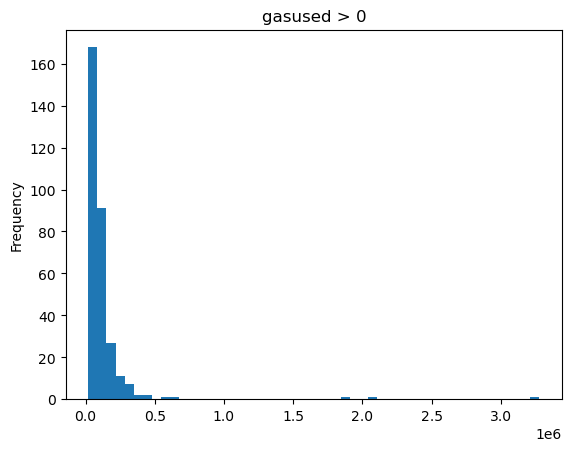

In [283]:
# plot bar chart of gas used where gas used > 0 and not null
temp = df[df['gasused'].notnull()]
temp = temp[temp['gasused'] > 0]

print("Count of gasused > 0", temp.shape[0])

temp['gasused'].plot(kind='hist', bins=50)
plt.title("gasused > 0")

temp['gasused'].value_counts(bins=50).sort_index()

gasused
(20619.844, 28603.1]    27
(28603.1, 36206.2]       4
(36206.2, 43809.3]       7
(43809.3, 51412.4]      13
(51412.4, 59015.5]       4
(59015.5, 66618.6]       4
(66618.6, 74221.7]       1
(74221.7, 81824.8]       0
(81824.8, 89427.9]       0
(89427.9, 97031.0]       1
(97031.0, 104634.1]      1
(104634.1, 112237.2]    19
(112237.2, 119840.3]     5
(119840.3, 127443.4]     2
(127443.4, 135046.5]     2
(135046.5, 142649.6]     2
(142649.6, 150252.7]     0
(150252.7, 157855.8]     0
(157855.8, 165458.9]     2
(165458.9, 173062.0]     1
(173062.0, 180665.1]     1
(180665.1, 188268.2]     2
(188268.2, 195871.3]     0
(195871.3, 203474.4]     0
(203474.4, 211077.5]     0
(211077.5, 218680.6]     0
(218680.6, 226283.7]     0
(226283.7, 233886.8]     1
(233886.8, 241489.9]     0
(241489.9, 249093.0]     0
(249093.0, 256696.1]     0
(256696.1, 264299.2]     0
(264299.2, 271902.3]     1
(271902.3, 279505.4]     0
(279505.4, 287108.5]     1
(287108.5, 294711.6]     0
(294711.6, 302314.7]

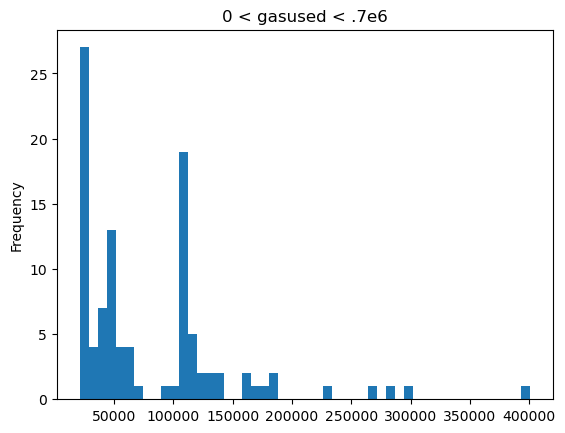

In [25]:
# plot bar chart of gas used where gas used > 0 and not null
temp = temp[temp['gasused'] < .7e6]

temp['gasused'].plot(kind='hist', bins=50)
plt.title("0 < gasused < .7e6")

temp['gasused'].value_counts(bins=50).sort_index()

## Interesting notes about the data

In [3]:
df_all = pd.read_csv('sample.csv', sep='\t')

### hash - unique identifier hash for a given transaction
1. most hashes are repeated many times. 
2. based on preliminary exploration it seems repeated hashes have the same to and from address and share most, but not all, values

In [33]:
# Get unique values in hash
print(len(df_all['hash'].unique()), "unique hashes out of", len(df_all['hash']), "total hashes.")

46505 unique hashes out of 403212 total hashes.


In [32]:
# Look at one hash to compare the values. 
print("hash 0x2b7cd2e8fd547f4ef784e6713a8c06926a0ff1ced45b97898e42a6a8dd458170: \n")
temp = df_all[df_all['hash'] == '0x2b7cd2e8fd547f4ef784e6713a8c06926a0ff1ced45b97898e42a6a8dd458170']

for col in temp.columns:
    print(temp[col], "\n")

hash 0x2b7cd2e8fd547f4ef784e6713a8c06926a0ff1ced45b97898e42a6a8dd458170: 

0       2023-02-24T00:00:00.167Z
1       2023-02-24T00:00:00.253Z
2       2023-02-24T00:00:00.280Z
948     2023-02-24T00:00:12.502Z
1257    2023-02-24T00:00:12.528Z
1541    2023-02-24T00:00:13.066Z
1721    2023-02-24T00:00:13.102Z
1770    2023-02-24T00:00:13.375Z
2049    2023-02-24T00:00:13.403Z
Name: detecttime, dtype: object 

0       0x2b7cd2e8fd547f4ef784e6713a8c06926a0ff1ced45b...
1       0x2b7cd2e8fd547f4ef784e6713a8c06926a0ff1ced45b...
2       0x2b7cd2e8fd547f4ef784e6713a8c06926a0ff1ced45b...
948     0x2b7cd2e8fd547f4ef784e6713a8c06926a0ff1ced45b...
1257    0x2b7cd2e8fd547f4ef784e6713a8c06926a0ff1ced45b...
1541    0x2b7cd2e8fd547f4ef784e6713a8c06926a0ff1ced45b...
1721    0x2b7cd2e8fd547f4ef784e6713a8c06926a0ff1ced45b...
1770    0x2b7cd2e8fd547f4ef784e6713a8c06926a0ff1ced45b...
2049    0x2b7cd2e8fd547f4ef784e6713a8c06926a0ff1ced45b...
Name: hash, dtype: object 

0         pending
1         pending
2       

### reorg - refers to the blockhash of the reorg, if there was one
1. Column 'reorg' has only nan values

In [21]:
# get unique values of 'reorg'
print(df_all['reorg'].unique())

[nan]


In [50]:
# print unique values of 'failurereason'
print("Count of unique failure reasons: ", len(df_all['failurereason'].unique()), "\n\n")

# print unique values of 'failurereason'
print("Unique failure reasons:\n")
for reason in  df_all['failurereason'].unique():
    print(reason)

Count of unique failure reasons:  86 


Unique failure reasons:

none
nan
Reverted: \Reason not specified\""
Reverted: \Too little received\""
Reverted: \hdb\""
Out of gas
Reverted: \SafeMath: subtraction overflow\""
Reverted: \Insufficient ETH amount sent...\""
Reverted: \ERC20: transfer amount exceeds allowance\""
Reverted: \ds-math-sub-underflow\""
Reverted: \UniswapV2Router: INSUFFICIENT_OUTPUT_AMOUNT\""
Reverted: \Too much requested\""
Reverted: \Sell has invalid parameters\""
Reverted: \:(\""
Reverted: \TransferHelper::transferFrom: transferFrom failed\""
Reverted: \Signed block number out of range\""
Reverted: \wrong nonce\""
Reverted: \EXPIRY_PASSED\""
Reverted: \UniswapV2Library: INSUFFICIENT_INPUT_AMOUNT\""
Reverted: Ãy 
Reverted: \Only one NFT is allowed.\""
Reverted: \Order cancelled or filled\""
Reverted: \Backrun protection\""
Reverted: \UniswapV2: TRANSFER_FAILED\""
Reverted: \UniswapV2Router: EXCESSIVE_INPUT_AMOUNT\""
Reverted: \ReentrancyGuard: reentrant call\""
Revert

### type - Post EIP-1559, this indicates how the gas parameters are submitted to the network: type 0 - legacy type 2 - using maxpriorityfeepergas and maxfeepergas
What is type 1??

In [5]:
print(df_all['type'].value_counts())

type
2    351459
0     51447
1       306
Name: count, dtype: int64


## Questions

### What is type 1?? 
schema only defines 0,2: type 0 - legacy; type 2 - using maxpriorityfeepergas and maxfeepergas

In [188]:
# What is type 1?? schema only defines 0,2: type 0 - legacy; type 2 - using maxpriorityfeepergas and maxfeepergas
print(df_all['type'].value_counts())

type
2    351459
0     51447
1       306
Name: count, dtype: int64


# Dataset time coverage info
How much data is this? (1 day? 1 hour?) 

In [22]:
# info about the time in the dataset

times = df['detecttime']

# print min and max detecttime
print("min time:", times.min(), "\nmax time:", times.max())

# get time between max and min
min_time = pd.to_datetime(times.min())
max_time = pd.to_datetime(times.max())

print("Time in dataset:", max_time - min_time)

min time: 2023-02-24T00:00:00.167Z 
max time: 2023-02-24T00:59:59.915Z
Time in dataset: 0 days 00:59:59.748000


### In particular, how many slots does it correspond to?

Time in proof-of-stake Ethereum is divided into slots (12 seconds) and epochs (32 slots) [1].


[1] [ethereum.org: Proof-of-stake (PoS)](https://ethereum.org/en/developers/docs/consensus-mechanisms/pos/)

In [25]:
# print curblocknumber values
print(df['curblocknumber'].value_counts().sort_index())


print("\nSlots:", len(df['curblocknumber'].value_counts()))

curblocknumber
16694512      67
16694513    1201
16694514    1794
16694515    1999
16694516    1574
            ... 
16694804    1446
16694805    1440
16694806    1168
16694807    1205
16694808    1199
Name: count, Length: 297, dtype: int64

Slots: 297
